# Synthetic Data Test

In [1]:
from mvlearn.embed.kcca import KCCA
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ortho_group

In [103]:
# Initialize number of samples
n_samples = 200
n_noise = 2
frac_signal = 0.9
np.random.seed(30)

# Define latent variable
latent = np.random.randn(n_samples,1)*(10*frac_signal)

# Split each dataset into a training set and test set (10% of dataset is test data)
latent_test = latent[:int(n_samples/10)]
latent_train = latent[int(n_samples/10):]

## Latent Data

In [129]:
def add_noise(X, n_noise=5, seed=1):
    np.random.seed(seed)
    noise = np.random.randn(X.shape[0], n_noise)
    return np.hstack((X, noise))

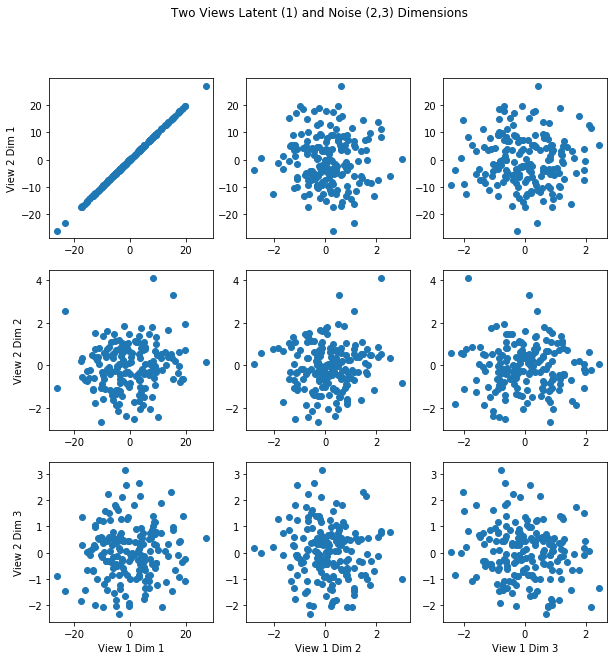

In [130]:
X1 = add_noise(latent_train, n_noise=n_noise, seed=1)
X2 = add_noise(latent_train, n_noise=n_noise, seed=2)

fig,axes = plt.subplots(3,3,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/3)
    dim1 = i % 3
    ax.scatter(X1[:,dim1],X2[:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Dim {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Dim {dim2+1}')

plt.suptitle('Two Views Latent (1) and Noise (2,3) Dimensions')
plt.show()

## Linear

In [131]:
def linear2view1(X, n_noise, seed=1):
    X = add_noise(X, n_noise=n_noise,seed=seed)
    ## Linear transform ax + b
    return X

def linear2view2(X, n_noise,seed=2):
    X = add_noise(X, n_noise=n_noise,seed=seed)
    np.random.seed(seed)
    U = ortho_group.rvs(X.shape[1])
    #U = np.array([[0,0,1],[0,1,0],[1,0,0]])
    ## Linear transform ax + b
    return X @ U + 2

In [132]:
n_noise=2
Xs_train = [linear2view1(latent_train, n_noise=n_noise), linear2view2(latent_train, n_noise=n_noise)]
Xs_test = [linear2view1(latent_test, n_noise=n_noise), linear2view2(latent_test, n_noise=n_noise)]

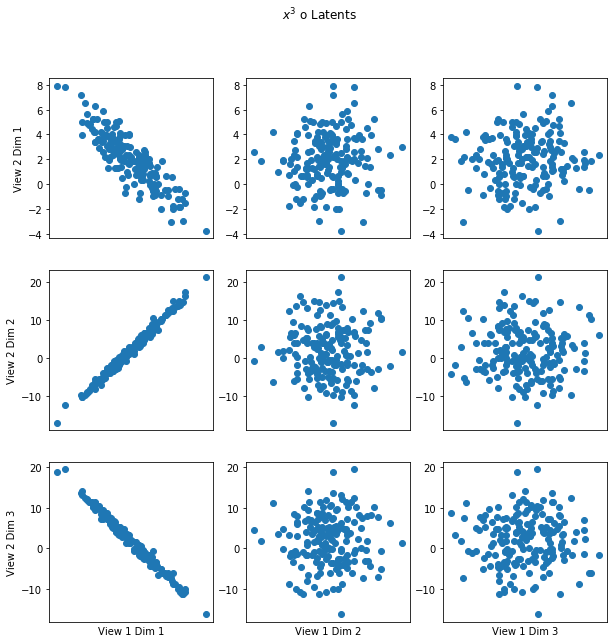

In [133]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
fig,axes = plt.subplots(3,3,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/3)
    dim1 = i % 3
    ax.scatter(Xs_train[0][:,dim1],Xs_train[1][:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Dim {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Dim {dim2+1}')
    ax.set_xticks([])
    
# axes[0].scatter(Xs_train[0][:,0],Xs_train[1][:,0])
# axes[0].set_title('Dimension 1')
# axes[0].set_xlabel('View 1')
# axes[0].set_ylabel('View 2')
# axes[0].set_xticks([])

# axes[1].scatter(Xs_train[0][:,2],Xs_train[1][:,2])
# axes[1].set_title('Dimension 2')
# axes[1].set_xlabel('View 1')
# axes[1].set_ylabel('View 2')
# axes[1].set_xticks([])

plt.suptitle('$x^3$ o Latents')
plt.show()

## Linear KCCA

In [134]:
# Initialize a linear kCCA class
kcca_l = KCCA(ktype ="linear", reg = 0.001, n_components = 3)

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca_training = kcca_l.fit_transform(Xs_train)

# Get attributes from the kCCA mapping on training data
train_weights = kcca_training.weights_
train_ccomponents = kcca_training.components_
train_ccorrelations = kcca_training.cancorrs_

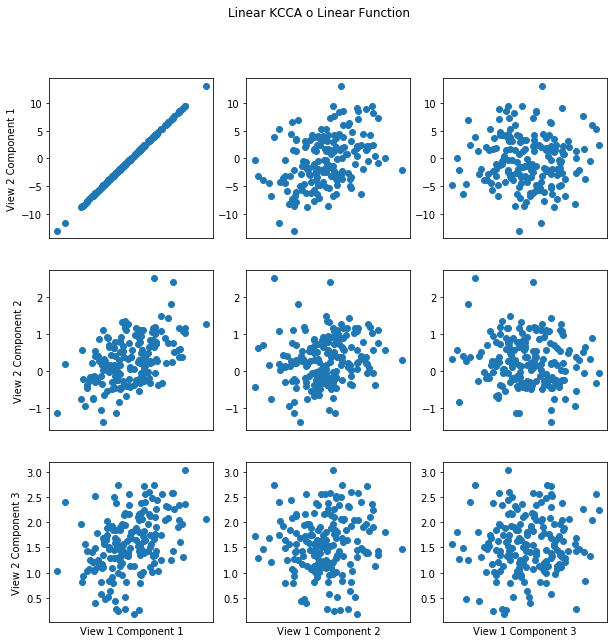

In [135]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
fig,axes = plt.subplots(3,3,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/3)
    dim1 = i % 3
    ax.scatter(train_ccomponents[0][:,dim1],train_ccomponents[1][:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Component {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Component {dim2+1}')
    ax.set_xticks([])

plt.suptitle('Linear KCCA o Linear Function')
plt.show()

## Nonlinear: polynomial

In [136]:
def add_noise(X, n_noise=5, seed=1):
    np.random.seed(seed)
    noise = np.random.randn(X.shape[0], n_noise)
    return np.hstack((X, noise))

def polyn2view1(X, n_noise, seed=1):
    X = add_noise(X, n_noise=n_noise, seed=seed)
    ## Linear transform ax + b
    return X

def polyn2view2(X, n_noise, seed=2):
    X = np.asarray([np.cbrt(x) for x in X])
    X = add_noise(X, n_noise=n_noise,seed=seed)
    return X

In [137]:
n_noise=2
Xs_train = [polyn2view1(latent_train, n_noise=n_noise), polyn2view2(latent_train, n_noise=n_noise)]
Xs_test = [polyn2view1(latent_test, n_noise=n_noise), polyn2view2(latent_test, n_noise=n_noise)]

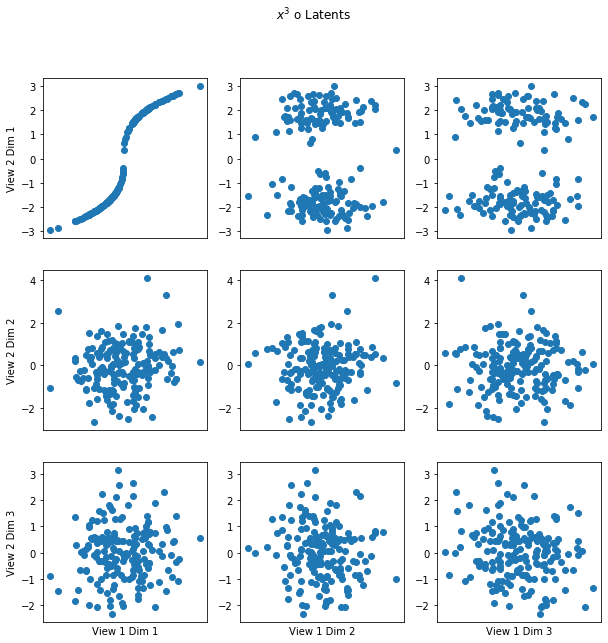

In [138]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
fig,axes = plt.subplots(3,3,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/3)
    dim1 = i % 3
    ax.scatter(Xs_train[0][:,dim1],Xs_train[1][:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Dim {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Dim {dim2+1}')
    ax.set_xticks([])
    
# axes[0].scatter(Xs_train[0][:,0],Xs_train[1][:,0])
# axes[0].set_title('Dimension 1')
# axes[0].set_xlabel('View 1')
# axes[0].set_ylabel('View 2')
# axes[0].set_xticks([])

# axes[1].scatter(Xs_train[0][:,2],Xs_train[1][:,2])
# axes[1].set_title('Dimension 2')
# axes[1].set_xlabel('View 1')
# axes[1].set_ylabel('View 2')
# axes[1].set_xticks([])

plt.suptitle('$x^3$ o Latents')
plt.show()

In [139]:
# Initialize a linear kCCA class
kcca_l = KCCA(ktype ="poly", reg = 0.001, n_components = 3)

# Use the fit.transform method to find a kCCA mapping and transform the views of data
kcca_training = kcca_l.fit_transform(Xs_train)

# Get attributes from the kCCA mapping on training data
train_weights = kcca_training.weights_
train_ccomponents = kcca_training.components_
train_ccorrelations = kcca_training.cancorrs_

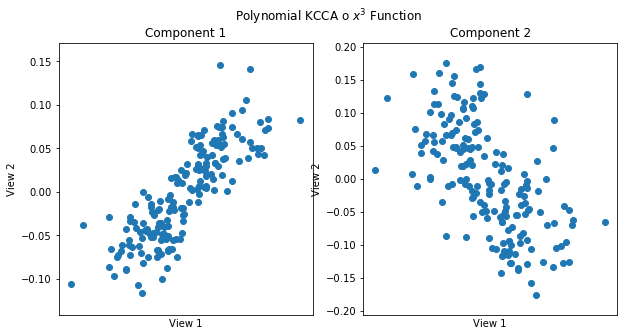

In [140]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(train_ccomponents[0][:,0],train_ccomponents[1][:,0])
axes[0].set_title('Component 1')
axes[0].set_xlabel('View 1')
axes[0].set_ylabel('View 2')
axes[0].set_xticks([])

axes[1].scatter(train_ccomponents[0][:,1],train_ccomponents[1][:,1])
axes[1].set_title('Component 2')
axes[1].set_xlabel('View 1')
axes[1].set_ylabel('View 2')
axes[1].set_xticks([])

plt.suptitle('Polynomial KCCA o $x^3$ Function')
plt.show()

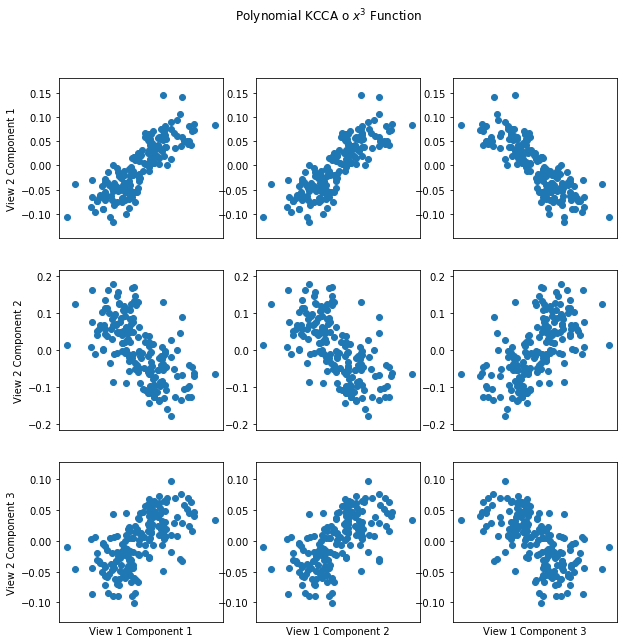

In [141]:
# We plot dimensions of both views to further show that the first two dimensions are linearly correlated
fig,axes = plt.subplots(3,3,figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    dim2 = int(i/3)
    dim1 = i % 3
    ax.scatter(train_ccomponents[0][:,dim1],train_ccomponents[1][:,dim2])
    #ax.set_title('Dimension 1')
    if dim2 == 2:
        ax.set_xlabel(f'View 1 Component {dim1+1}')
    if dim1 == 0:
        ax.set_ylabel(f'View 2 Component {dim2+1}')
    ax.set_xticks([])

plt.suptitle('Polynomial KCCA o $x^3$ Function')
plt.show()